
# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information from over 100,000 medical appointments from Brazil, and whether the patients showed up for there appointments or not. Other characteristics for each patient include:
- patient ID
- Appointment ID
- Gender: " M" or "F"
- Scheduled Day: " Date and time patient made the appointment"
- Appointment Day: " Date and time of actual appointment"
- Age
- Neighbourhood: "Neighbourhood of the hospital"
- scholarship: "Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família"
- if the patient suffers from any dieseases such as Hypertension, Diabetes, Handicap and Alchoholism.
- SMS recieved: " indicates whether or not an SMS message was recieved for appointment"
- No show: " where the patient should up or not"


### Question(s) for Analysis
> The aim of this analysis is to determine What factors effect where or not a patient shows up for their appointment and how this data can be used to predict if a patient will show up for their scheduled appointment. This is done by answering the following research questions:
1. what percentage of patients showed up and did not show up?
2. what is the relationship between gender and show/no-show.?
3. what is the relationship between age and show/no-show?
4. Did SMS-reminders decrease the proportion of patients not showing up?
5. Does the neighbourhood relate to patient show-up?
 

In [1]:
# importing necessary packages and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General 
> First of all lets load our data set and have a quick look at the first few rows.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
sum(df.duplicated())

0

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- The data set contains 110,527 entry and 14 columns.

- Data types are of the types, float, intger and string.

- There are no null values or duplicate rows.

### Summary Statstics

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
Before doing any furthur analysis, the data must first be cleaned and trimmed to be able to analyze without any problems.
This includes the following:

1. The appointment ID and patient ID are dropped as they are not a factor in the analysis.
2. Schedule day and Appointment day are changed from object to datetime format.
3. From summary statistics there are rows with negative ages. these rows are replaced with the mean age.
4. Columns are renamed to make all lowercase and replace the "-" and spaces with underscore.


1. First we will drop the columns for appointment ID and patient ID as they will not be used in our analysis

In [9]:
# dropping the appointment ID and patient ID columns.
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

checking to see if it worked

In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


2. Now will change all column names to lower case for consistancy and avoid any mistakes during analysis.

In [11]:
df.columns=df.columns.str.lower()

checking to see if it worked

In [12]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


3. Next we will replace the "-" in the no-show column heading name with underscore

In [13]:
df.columns=df.columns.str.replace('-','_')

In [14]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


4. correct spelling mistake for hipertension to make it hypertension

In [15]:
df.rename(columns={"hipertension":"hypertension"},inplace=True)

5. The next step would be to change the data type for 'scheduledday' and 'appointmentday' from object to datetime.

In [16]:
df['scheduledday']=pd.to_datetime(df['scheduledday'])

In [17]:
df['appointmentday']=pd.to_datetime(df['appointmentday'])

checking to see it the change it done

In [18]:
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

6. As seen earlier, we have some negative values for age which we must fix. we will replace these values with the mean age.

In [19]:
df.loc[ df['age'] <0, 'age'] = df['age'].mean()

checking statistics to see if negative age is gone.

In [20]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


changing age from float to int

In [22]:
df.age=df.age.astype(int)

7. The final step is to divide the dataframe into 2 dataframes, one for show and one for no_show.

In [23]:
#creating data frame for patients how showed up for appointment
df_show= df[df['no_show'] == 'No']

In [24]:
#creating dataframe for patients who did not show up
df_noshow= df[df['no_show'] == 'Yes']

dropping the columns for no_show as it is now not necessary.

In [25]:
df_show.drop(['no_show'], axis=1, inplace=True)
df_noshow.drop(['no_show'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88208 entries, 0 to 110526
Data columns (total 11 columns):
gender            88208 non-null object
scheduledday      88208 non-null datetime64[ns]
appointmentday    88208 non-null datetime64[ns]
age               88208 non-null int64
neighbourhood     88208 non-null object
scholarship       88208 non-null int64
hypertension      88208 non-null int64
diabetes          88208 non-null int64
alcoholism        88208 non-null int64
handcap           88208 non-null int64
sms_received      88208 non-null int64
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 8.1+ MB


In [27]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 11 columns):
gender            22319 non-null object
scheduledday      22319 non-null datetime64[ns]
appointmentday    22319 non-null datetime64[ns]
age               22319 non-null int64
neighbourhood     22319 non-null object
scholarship       22319 non-null int64
hypertension      22319 non-null int64
diabetes          22319 non-null int64
alcoholism        22319 non-null int64
handcap           22319 non-null int64
sms_received      22319 non-null int64
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 2.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data has been trimmed and cleaned we are ready to explore the data and look at the questions asked earlier.

> first of all lets look at each dataframe seperately.





In [28]:
df_show.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,37.790495,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
std,23.338513,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we can see that 88,208 patient showed up for their appointment, which mean age of 37.8 years old.

In [29]:
df_noshow.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we see that 22,319 patient did not show up for their appointment, with mean age of 34.3 years old.

### Question 1: what percentage of patients showed up and did not show up?

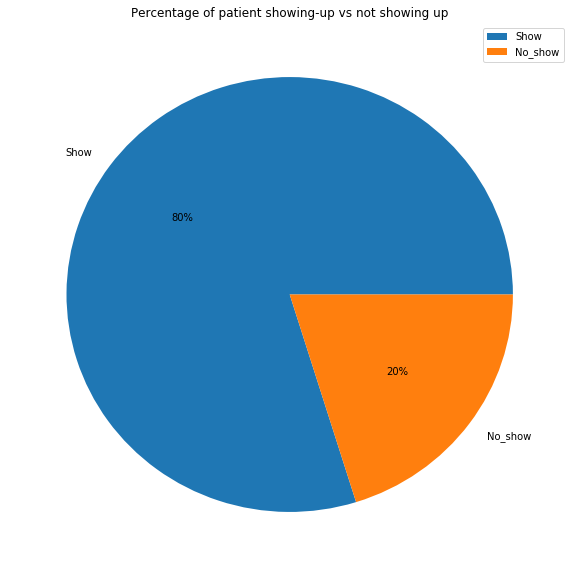

In [30]:
plt.figure(figsize =(10,10));
plt.pie([len(df_show),len(df_noshow)],labels =['Show','No_show'],autopct='%1.0f%%');
plt.title('Percentage of patient showing-up vs not showing up');
plt.legend();

We can see that 80% of patient showed up for their appointment, while 20% did not.

### Question 2: what is the relationship between gender and show/no-show.?

In [43]:
def show_plot(col):
    df_show[col].value_counts().plot(kind="bar", figsize=(10,10))
    plt.ylabel("no.of patients")
    plt.title(col);

def noshow_plot(col):
    df_noshow[col].value_counts().plot(kind="bar",figsize=(10,10))
    plt.ylabel("no.of patients")
    plt.title(col);

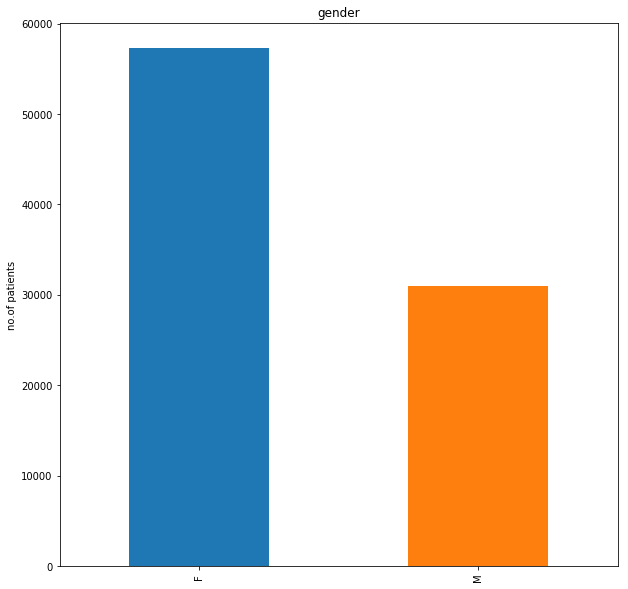

In [44]:
show_plot('gender')





















From the above chart we can see that more females showed up for their appointments than males

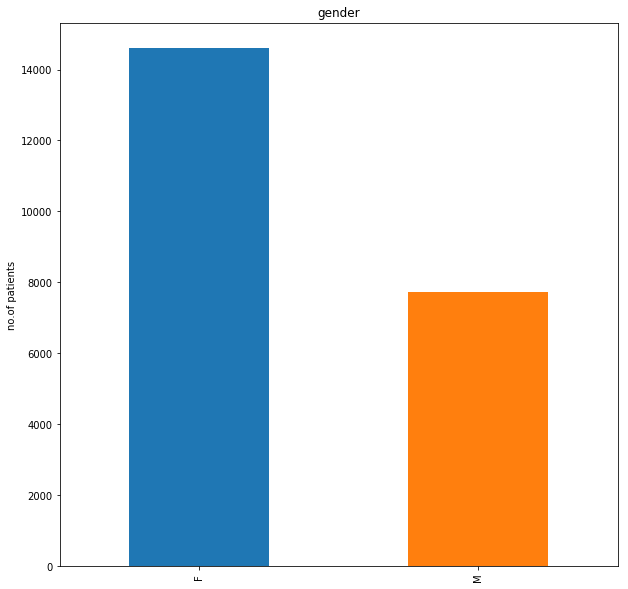

In [45]:
noshow_plot('gender')

The chart above shows that also more females did not show up than males for their appointment, therefore it makes more sense to see the percentage of females to males showing up as clearly there are more females than male patients

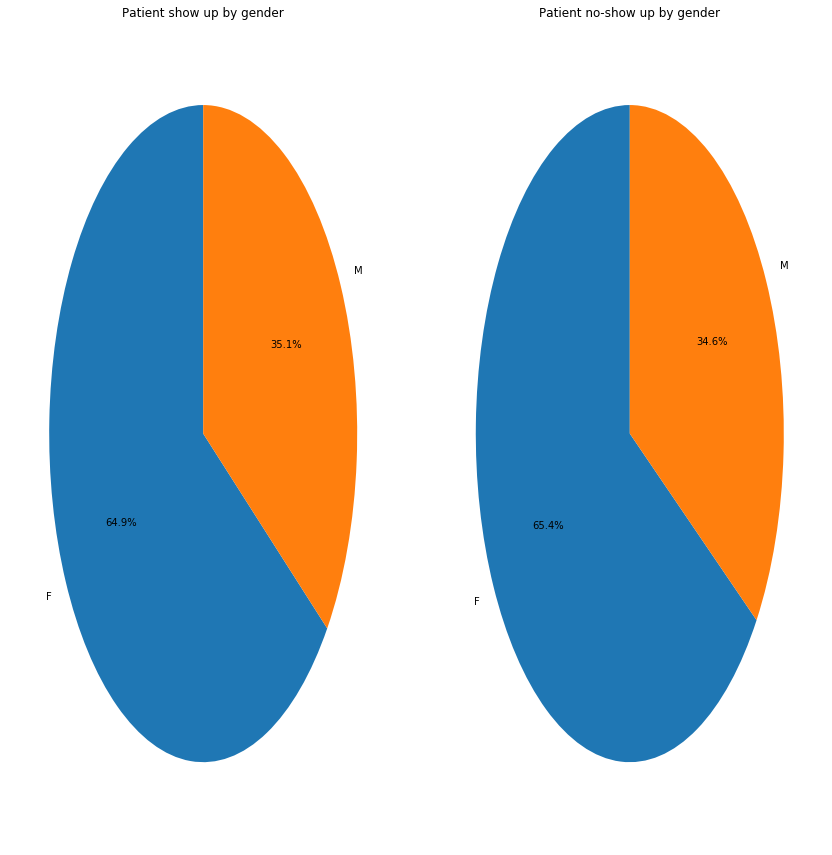

In [46]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,12)) #ax1,ax2 refer to our two pies
fig.tight_layout()

percentage_show= df_show['gender'].value_counts()/len(df_show['gender'])
ax1.pie(percentage_show,labels=['F','M'],autopct='%1.1f%%',startangle=90)
ax1.set_title('Patient show up by gender');

percentage_noshow= df_noshow['gender'].value_counts()/len(df_noshow['gender'])
ax2.pie(percentage_noshow,labels=['F','M'],autopct='%1.1f%%',startangle=90)
ax2.set_title('Patient no-show up by gender');


From the 2 pie charts above, we can see that the percentage of female and male patients who showed up and did not show up are approximately the same, which means that gender does not necessarliy affect where a patient shows up or not.

### Question 3: Did SMS-reminders decrease the proportion of patients not showing up?

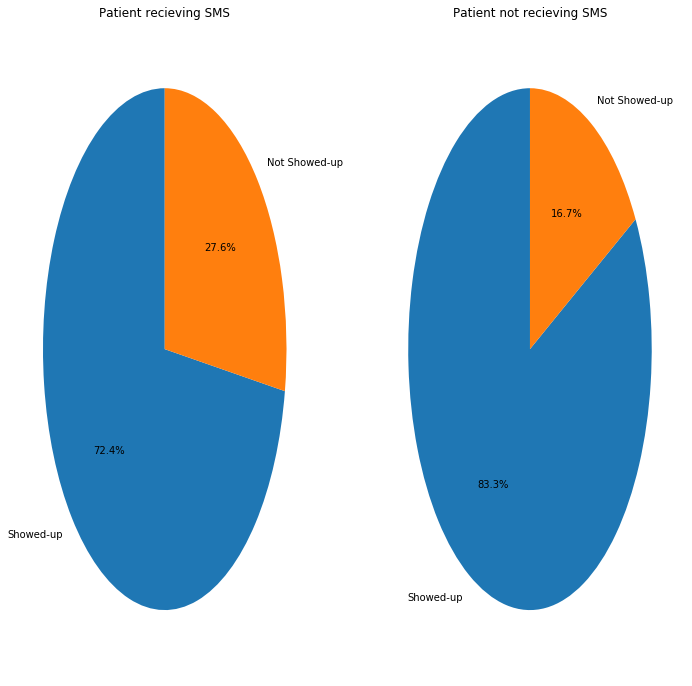

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,12)) #ax1,ax2 refer to our two pies


sms_show = df_show['sms_received'].sum() # number of patients who receives an SMS and shows up
sms_noshow = df_noshow['sms_received'].sum() # number of patients who receives an SMS and does not show up

ax1.pie([sms_show,sms_noshow],labels =['Showed-up','Not Showed-up'],autopct='%1.1f%%',startangle=90)
ax1.set_title('Patient recieving SMS');

no_sms_show = (df_show['sms_received']==0).sum() # number of patients who do not receives SMS and show up
no_sms_noshow = (df_noshow['sms_received']==0).sum() # number of patients who do not receives SMS and did not show up

ax2.pie([no_sms_show,no_sms_noshow],labels =['Showed-up','Not Showed-up'],autopct='%1.1f%%',startangle=90);
ax2.set_title( 'Patient not recieving SMS');

The above pie chart shows that 72% of patients who recieved an SMS message should up for their appointment, while 28% did not.However for patients who did not recieve an SMS message, 83% of them showed up for their appointment while only 17% did not. Which means that people who recieved an SMS should up less!!

 ### Question 4: what is the relationship between age and show/no-show?

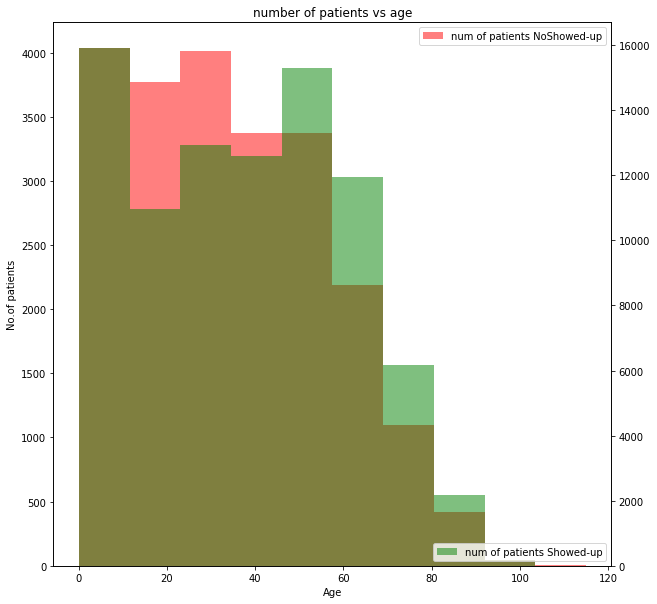

In [48]:
plt.figure(figsize =(10,10))

plt.hist(df_noshow['age'],color='r',alpha=0.5,label='num of patients NoShowed-up');
plt.legend(loc='upper right');
plt.xlabel('Age')
plt.ylabel('No.of patients')

plt.twinx()
plt.hist(df_show['age'],color='g',alpha=0.5,label='num of patients Showed-up');
plt.legend(loc='lower right');
plt.title('number of patients vs age')

plt.show()


we can see that more younger patients did not show up than older ones

 ### Question 5: Does the neighbourhood relate to patient show-up?

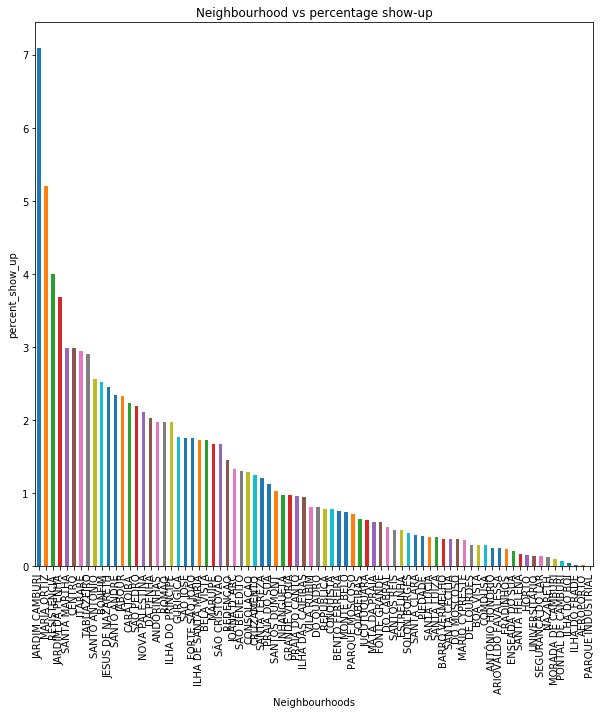

In [49]:

plt.figure(figsize =(10,10))
#hist of Ages of show-up patients 
hood_showup= df_show['neighbourhood'].value_counts()
hood_showup
hood_showup_percentage=(hood_showup/len(df_show['neighbourhood']))*100
hood_showup_percentage.plot(kind='bar');
plt.title('Neighbourhood vs percentage show-up');
plt.xlabel('Neighbourhoods');
plt.ylabel('percent_show_up');

The bar chart above shows the percentage of patient show-up per neighbourhood. We can see that there is a large variation due there being 80 neighbourhoods, with 7% of patient coming from one neighbourhood. It can be concluded that some neighbourhoods have more show-ups than others.

<a id='conclusions'></a>
## Conclusions
After a thorough exploratory data analysis for the dataset it can be concluded that:
1. 80% of patients made it to their appointment while 20% did not.
2. There are more female than male patients, however gender is not a determining factor in whether a patient misses his appointment.
3. Reciveing an SMS message is not necessary for patient to show up as more patient showed up without reciveing SMS than those who did.
4. The average age of patient who showed up is 38 years old, while the average age for patients who did not show up was 34. meaning that younger patients tend to miss their appointments more than older patients.
5. Some neighbourhoods have more show ups than other, and so there might be a direct relation to whether a patient shows up.

<a id='limitations'></a>
## Limitations
The two main limitation to be considred are:
1. Age, there were some negative age values that was replaced with the mean age, which can be some what inaccurate.
2. The column for Patient ID and appointment ID were dropped from the analysis, however one patient can have only one patient ID but several appointment ID's, meaning that many of the entries might belong to the same patient.



In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0